Goal: Investigate how DSNN fares in a toy problem. 

Compare following models:
- Large dense (same architecture as large sparse, but dense)
- Small dense (same number of params as large sparse, but dense)
- Large sparse
- Large sparse + dynamic sparse


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# general imports
import os
import numpy as np

# torch imports
import torch
import torch.optim as optim
import torch.optim.lr_scheduler as schedulers
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchsummary import summary

# nupic research imports
from nupic.research.frameworks.pytorch.image_transforms import RandomNoise
from nupic.torch.modules import KWinners

# local library
from networks_module.base_networks import *
from models_module.base_models import *

# local files
from utils import *
import math

# plotting
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = (12,6)

PATH_TO_WHERE_DATASET_WILL_BE_SAVED = PATH = "~/nta/datasets"

## Test with kwinners

In [3]:
from models_module.base_models import BaseModel, SparseModel, DSNNMixedHeb
from networks_module.hebbian_networks import MLP, MLPHeb

In [4]:
# load dataset
config = (dict(
    dataset_name="MNIST",
    data_dir="~/nta/datasets",
    test_noise=True
))
dataset = Dataset(config)

In [13]:
test_noise = True
use_kwinners = True
epochs = 15
on_perc = 0.1

# large dense
config = dict(hidden_sizes=[100,100,100], use_kwinners=use_kwinners)
network = MLP(config=config)
config = dict(debug_weights=True)
model = BaseModel(network=network, config=config)
model.setup()
print("\nLarge Dense")
large_dense = model.train(dataset, epochs, test_noise=test_noise);


Large Dense
Train acc: 0.8761, Val acc: 0.9380, Noise acc: 0.9314
Train acc: 0.9564, Val acc: 0.9553, Noise acc: 0.9511
Train acc: 0.9649, Val acc: 0.9460, Noise acc: 0.9415
Train acc: 0.9663, Val acc: 0.9549, Noise acc: 0.9506
Train acc: 0.9675, Val acc: 0.9482, Noise acc: 0.9454
Train acc: 0.9635, Val acc: 0.9266, Noise acc: 0.9207
Train acc: 0.5230, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980
Train acc: 0.0987, Val acc: 0.0980, Noise acc: 0.0980


## Debugging the dense model

In [15]:
large_dense

defaultdict(list,
            {'train_loss': [0.4117379237174988,
              0.1579397918820381,
              0.12979069519837697,
              0.1254622137248516,
              0.13399272019465763,
              0.1677697219669819,
              nan,
              nan,
              nan,
              nan,
              nan,
              nan,
              nan,
              nan,
              nan],
             'train_acc': [0.8760666666666667,
              0.9564166666666667,
              0.9648833333333333,
              0.96625,
              0.96745,
              0.96345,
              0.523,
              0.09871666666666666,
              0.09871666666666666,
              0.09871666666666666,
              0.09871666666666666,
              0.09871666666666666,
              0.09871666666666666,
              0.09871666666666666,
              0.09871666666666666],
             'linear_0_mean': [-0.00019430241081863642,
              0.00027377685182727873,
          

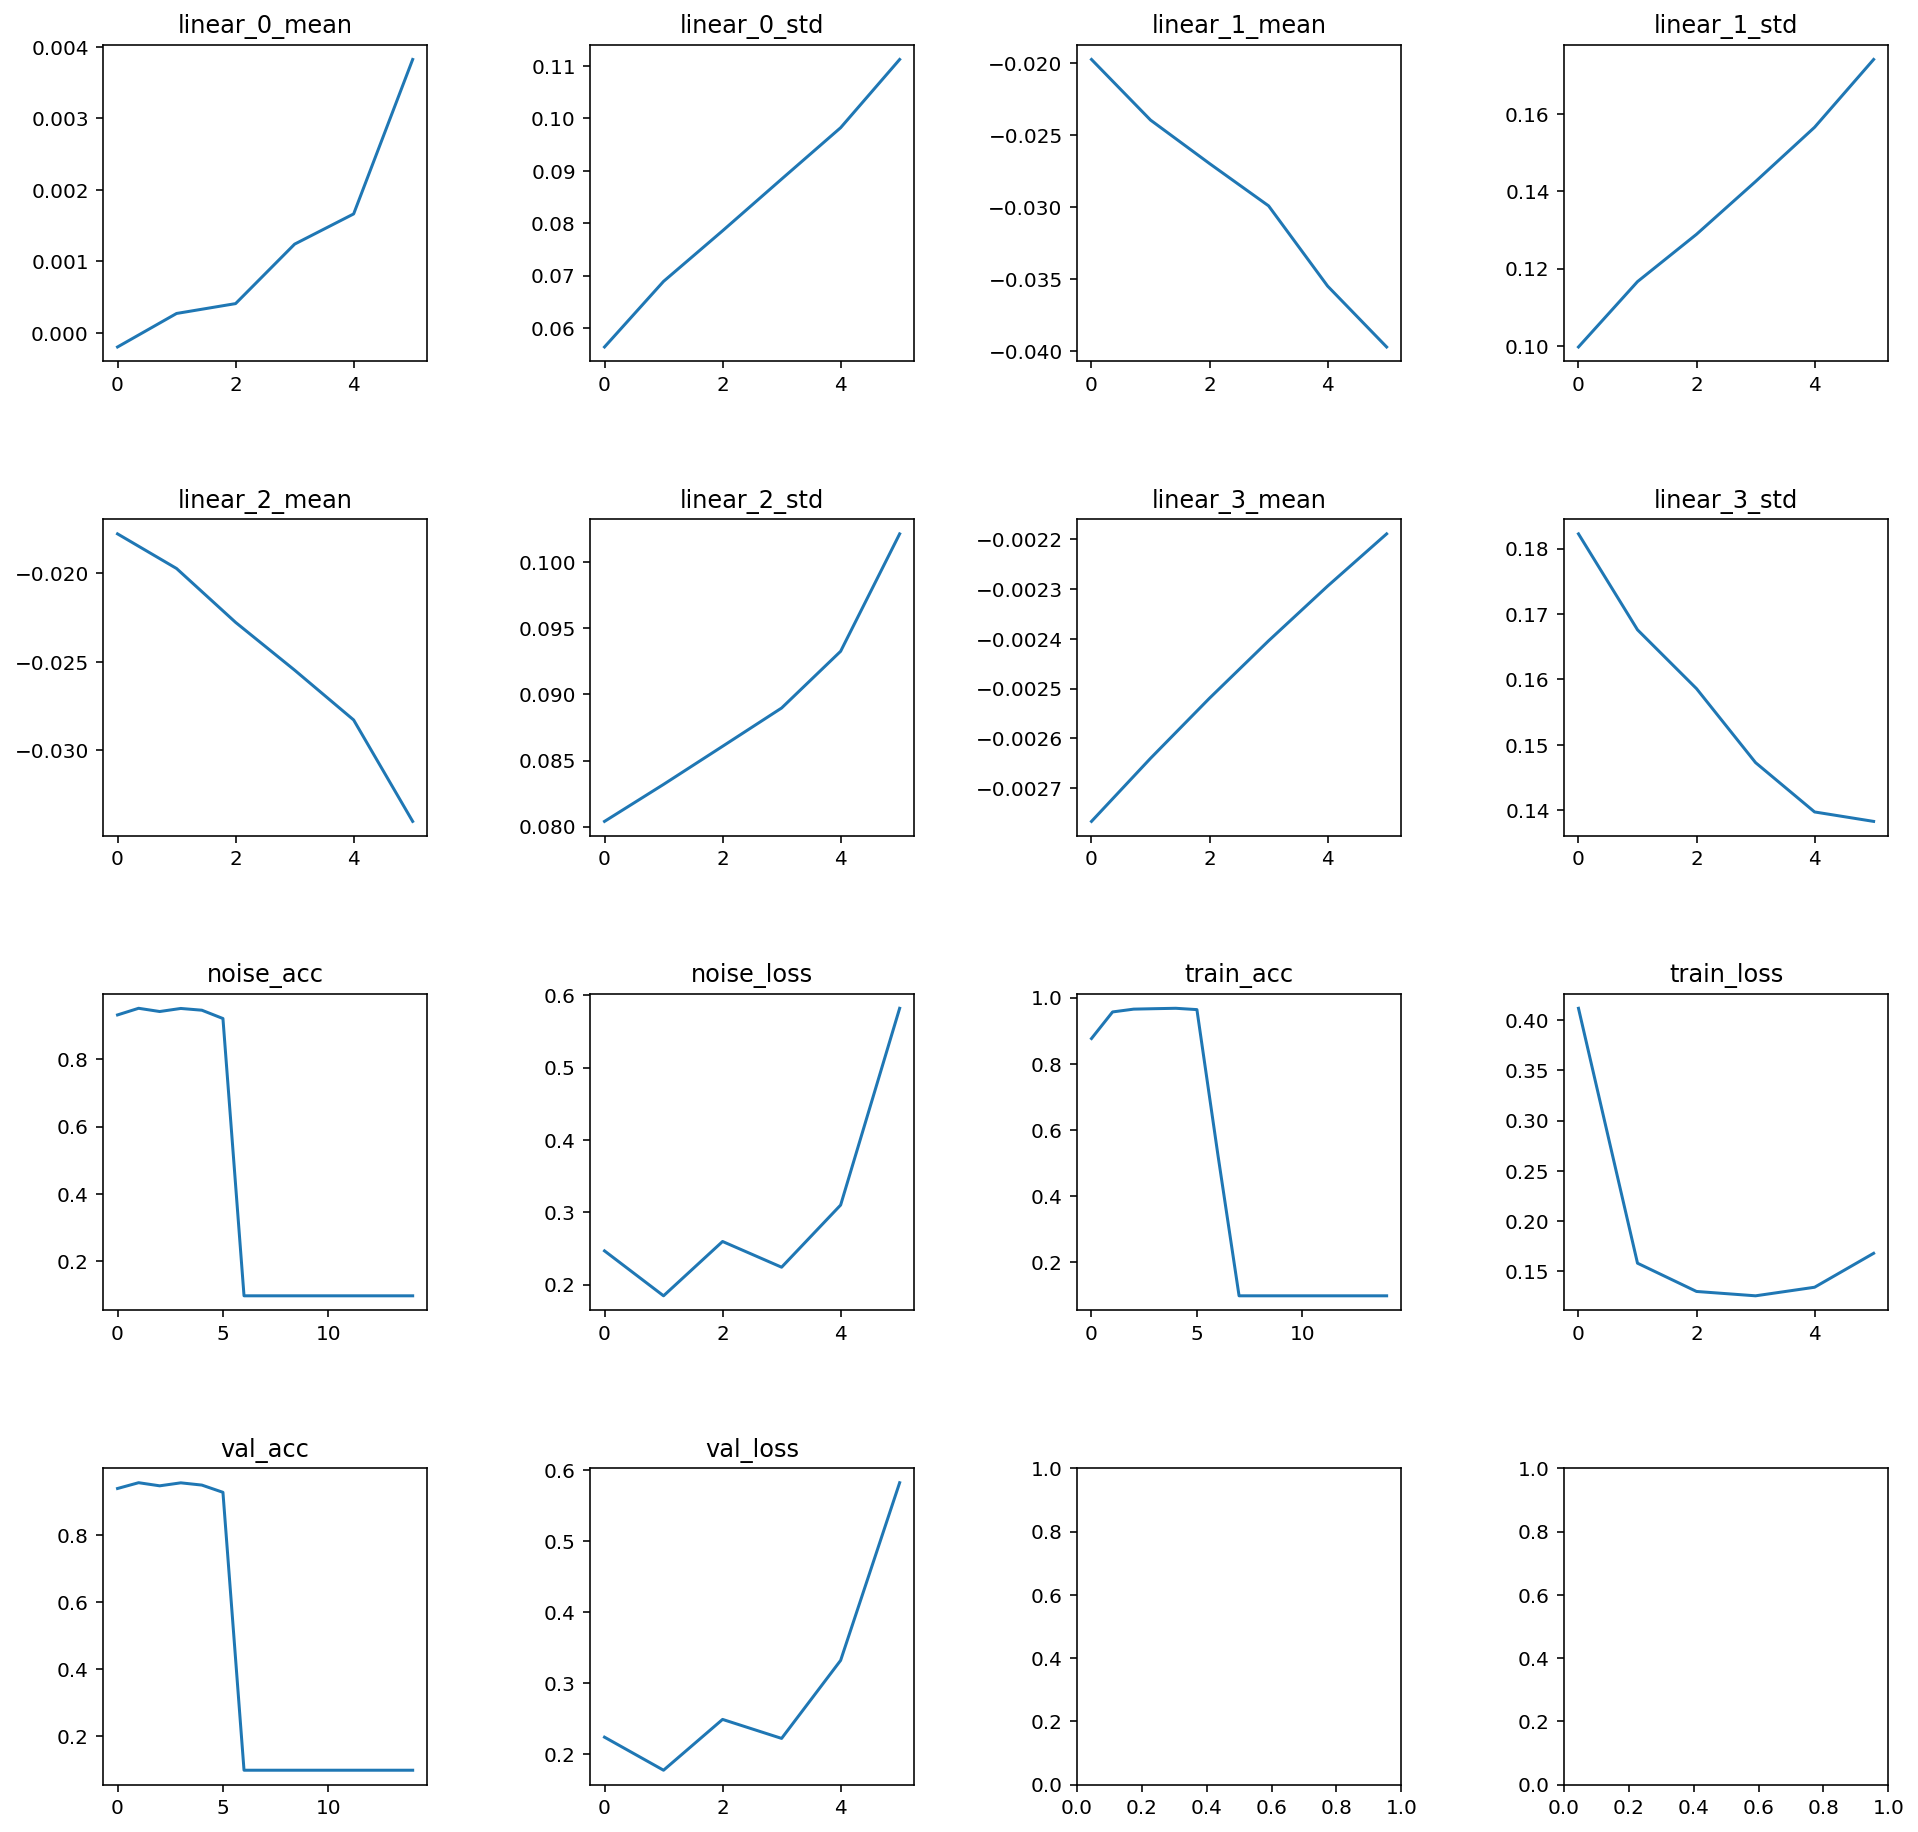

In [16]:
results = large_dense
h, w = math.ceil(len(results)/4), 4 
combinations = []
for i in range(h):
    for j in range(w):
        combinations.append((i,j))

fig, axs = plt.subplots(h, w, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(16,16)
for (i, j), k in zip(combinations[:len(results)], sorted(results.keys())):
    axs[i, j].plot(range(len(results[k])), results[k])
    axs[i, j].set_title(k)
